In [2]:
# fajnie
# nie fajnie
# kamil
# jakub
# pycharm

# miło tutaj jest 
# fajnie pycharm fajnie

In [3]:
# fajnie nie kamil jakub pycharm
# 1       0    0     0      0
# 1       1    0     0      0
# 0       0    1     0      0 

# .
# .


# 0       0     0    0      0
# 2       0     0    0      1'

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [5]:
artists_data = pd.read_csv('all_artists_data.csv')

In [6]:
artists_data

,Unnamed: 0,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,ARTIST,CONTENT_LEN
0,0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,SPAM,Katy,126
1,1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,SPAM,Katy,159
2,2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,SPAM,Katy,340
3,3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,SPAM,Katy,52
4,4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,SPAM,Katy,80
...,...,...,...,...,...,...,...,...
1951,1951,z13lvr4iupatjlrem231yvpxolzvspwdl,Salty Croc,2014-07-22T04:20:37.489000,Like this comment for no reason﻿,SPAM,LMFAO,32
1952,1952,z12lxhrqdkyusbkji04cihtrvn3jvxnqszg0k,Bob Orton,2014-07-22T00:26:50.820000,love this song﻿,VALID,LMFAO,15
1953,1953,z12xhdjrsxm3v550w22oynsjrnmvjhkvj,LuckyMusiqLive,2014-07-21T22:25:54.048000,this song is awesome. these guys are the best....,SPAM,LMFAO,216
1954,1954,z13msngo3qvwx1ym223pehqgouexzdmnm,xXxPWND 420xXx,2014-07-21T11:05:51.945000,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,SPAM,LMFAO,48


In [7]:
content = artists_data['CONTENT']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
di = {'SPAM': 1, 'VALID': 0}

In [10]:
artists_data['CLASS_ID'] = artists_data['CLASS'].apply(lambda row: di[row])

In [11]:
class_id = artists_data['CLASS_ID']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(content, class_id, test_size=0.2)

In [13]:
vectorizer = CountVectorizer(min_df=3)

In [14]:
features = vectorizer.fit_transform(x_train).toarray()

In [15]:
pd.DataFrame(features, columns=vectorizer.get_feature_names())

,00,000,10,100,11,13,14,15,16,17,...,you,young,your,yourself,youtu,youtube,youtuber,youtubers,zonepa,강남스타일
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1560,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
model = LogisticRegression()

In [18]:
model.fit(features, y_train)

LogisticRegression()

In [19]:
test_features = vectorizer.transform(x_test)

In [20]:
model.score(test_features, y_test)

0.951530612244898

In [21]:
from typing import List

In [22]:
def get_model_score(data: pd.DataFrame, train_idx: List, test_idx: List) -> float:
    x_train, y_train = data['CONTENT'][train_idx], data['CLASS'][train_idx]
    x_test, y_test = data['CONTENT'][test_idx], data['CLASS'][test_idx]
    vectorizer = CountVectorizer(min_df=5)
    features = vectorizer.fit_transform(x_train).toarray()
    model = LogisticRegression()
    model.fit(features, y_train)
    test_features = vectorizer.transform(x_test).toarray()
    score = model.score(test_features, y_test)
    return score

# Some test of k-fold cross validation 

In [23]:
kp_data = pd.read_csv('Youtube02-KatyPerry.csv')

In [24]:
kp_data

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1
...,...,...,...,...,...
345,z12sjp3zgtqnvlysj23zuxxaolrvd1oj504,Kacy Cluley,2015-06-05T18:59:52,This song means so much to me thank you soooo...,0
346,z132enrpoy35yxpoe04cjr4zur3jvbyq3xo0k,Kasia Fabisiewicz,2015-06-05T19:02:05,&lt;3﻿,0
347,z132jbmxfqm4fjysg23nwjfb2mv2vxnua,Decio Alves Martins,2015-06-05T19:29:20,"KATY PERRY, I AM THE ""DÉCIO CABELO"", ""DECIO HA...",1
348,z12cdlswetvnejcri04cex0jfwy2u3tzj54,Rafi Hossain,2015-06-05T19:55:08,Honestly speaking except taylor swift and adel...,0


In [25]:
Czesc 1
czesc 2
Czesc 3
Czesc 4 
Czesc 5

ucz 1-4, test 5
ucz 1-3, 5, test 4
ucz 1,2, 4, 5,  test 3

ucz 2-5,  test 1

SyntaxError: invalid syntax (<ipython-input-25-bf0b3e3ba1b4>, line 1)

In [43]:
from sklearn.model_selection import KFold

In [45]:
scores_katy = []
for _ in range(100):
    kf = KFold(5, shuffle=True)
    for train_idxs, test_idxs in kf.split(X=kp_data['CONTENT']):
        score = get_model_score(data=kp_data, train_idx=train_idxs, test_idx=test_idxs)
        scores_katy.append(score)

In [46]:
scores_katy

[0.9857142857142858,
 0.9428571428571428,
 0.9285714285714286,
 0.9285714285714286,
 0.9,
 0.9428571428571428,
 0.9428571428571428,
 0.9285714285714286,
 0.9714285714285714,
 0.9428571428571428,
 0.8714285714285714,
 0.9857142857142858,
 0.9571428571428572,
 0.9142857142857143,
 0.9571428571428572,
 0.9428571428571428,
 0.9285714285714286,
 0.9142857142857143,
 0.9,
 0.9714285714285714,
 0.9285714285714286,
 0.9142857142857143,
 0.9428571428571428,
 0.9,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9428571428571428,
 0.9571428571428572,
 0.9285714285714286,
 0.9714285714285714,
 0.9285714285714286,
 0.9714285714285714,
 0.9285714285714286,
 0.9428571428571428,
 0.9714285714285714,
 0.9857142857142858,
 0.8571428571428571,
 0.9428571428571428,
 0.9285714285714286,
 0.9428571428571428,
 0.9857142857142858,
 0.9285714285714286,
 0.9,
 0.9428571428571428,
 0.9142857142857143,
 0.9857142857142858,
 0.9428571428571428,
 0.9428571428571428,
 0.9285714285714286,
 0.9285714

In [47]:
import numpy as np

In [48]:
np.mean(scores_katy)

0.9413142857142858

In [52]:
np.std(scores_katy)

0.026093771248311047

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

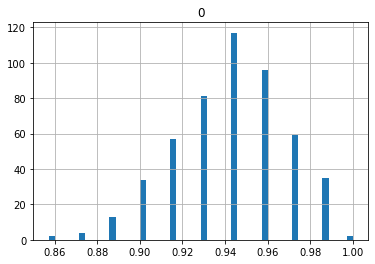

In [54]:
pd.DataFrame(scores_katy).hist(bins=50)

# HOMEWORK

# 0) !!!!!   Change in repo BUILDINGS children_weights method
## 1) Same model validation for another artist's dataset
## 2) Train model on one's artist data, test on another ;)
## 3) Find in Internet some i.e. speeches, books texts, poems - for a few (3-4-5) different artists/persons, save them into separate files for next week lesson

In [55]:
eminem_data = pd.read_csv('Eminem.csv')

In [56]:
eminem_data

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1
...,...,...,...,...,...
443,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
444,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,1
445,LneaDw26bFuvs-8oWkLpAFa6g3QHpWD8k7sbbMP3Bg8,The Guy That's Done Everything,NaN,3 yrs ago I had a health scare but thankfully ...,1
446,z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k,Jesse Pinkman,2015-05-06T11:42:44.601000,Rihanna looks so beautiful with red hair ;)﻿,0


In [57]:
scores_eminem = []
for _ in range(100):
    kf = KFold(5, shuffle=True)
    for train_idxs, test_idxs in kf.split(X=kp_data['CONTENT']):
        score = get_model_score(data=eminem_data, train_idx=train_idxs, test_idx=test_idxs)
        scores_eminem.append(score)

In [58]:
scores_eminem

[0.9857142857142858,
 0.9428571428571428,
 0.9571428571428572,
 0.8571428571428571,
 0.9285714285714286,
 0.9571428571428572,
 0.9571428571428572,
 0.9428571428571428,
 0.9428571428571428,
 0.8857142857142857,
 0.9571428571428572,
 0.8428571428571429,
 0.9714285714285714,
 0.9428571428571428,
 0.9857142857142858,
 0.9571428571428572,
 0.9285714285714286,
 0.9571428571428572,
 0.9428571428571428,
 0.9571428571428572,
 0.9142857142857143,
 0.9,
 0.9714285714285714,
 0.9714285714285714,
 0.9285714285714286,
 0.9571428571428572,
 0.9285714285714286,
 0.9571428571428572,
 0.9714285714285714,
 0.9428571428571428,
 0.9857142857142858,
 0.9285714285714286,
 0.9142857142857143,
 0.9,
 0.9285714285714286,
 0.9571428571428572,
 0.8857142857142857,
 0.9857142857142858,
 0.9285714285714286,
 0.9428571428571428,
 0.9571428571428572,
 0.9142857142857143,
 0.9714285714285714,
 0.9428571428571428,
 0.9428571428571428,
 0.9428571428571428,
 0.9714285714285714,
 0.8857142857142857,
 0.9428571428571428,
 

In [59]:
np.mean(scores_eminem)

0.9383714285714286

In [60]:
np.std(scores_eminem)

0.028282120983882015

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

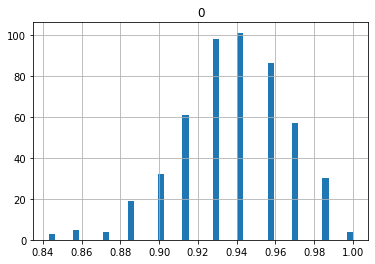

In [61]:
pd.DataFrame(scores_eminem).hist(bins=50)

In [81]:
scores_double_trained = []
for _ in range(100):
    kf = KFold(5, shuffle=True)
    for train_idxs, test_idxs in kf.split(X=kp_data['CONTENT']):
        score = get_model_score(data=eminem_data, train_idx=train_idxs, test_idx=test_idxs)
        scores_double_trained.append(score)

In [82]:
scores_double_trained

[0.9428571428571428,
 0.8857142857142857,
 0.9857142857142858,
 0.9142857142857143,
 0.9285714285714286,
 0.9714285714285714,
 0.9,
 0.9571428571428572,
 0.9,
 0.9285714285714286,
 0.9714285714285714,
 0.9428571428571428,
 0.8714285714285714,
 0.9714285714285714,
 0.9428571428571428,
 0.8857142857142857,
 0.9142857142857143,
 0.9714285714285714,
 0.9428571428571428,
 0.9571428571428572,
 0.9142857142857143,
 0.9714285714285714,
 0.9428571428571428,
 0.9428571428571428,
 0.9571428571428572,
 0.9571428571428572,
 0.9285714285714286,
 0.9142857142857143,
 0.9714285714285714,
 0.8857142857142857,
 0.9714285714285714,
 0.9142857142857143,
 0.9428571428571428,
 0.8857142857142857,
 0.9285714285714286,
 0.9571428571428572,
 0.9142857142857143,
 0.9571428571428572,
 0.9285714285714286,
 0.9571428571428572,
 0.9285714285714286,
 0.9285714285714286,
 0.9285714285714286,
 0.9714285714285714,
 0.8714285714285714,
 0.9571428571428572,
 0.9571428571428572,
 0.9285714285714286,
 0.9142857142857143,
 

In [83]:
np.mean(scores_double_trained)

0.9381714285714287

In [84]:
np.std(scores_double_trained)

0.027805505254337313

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

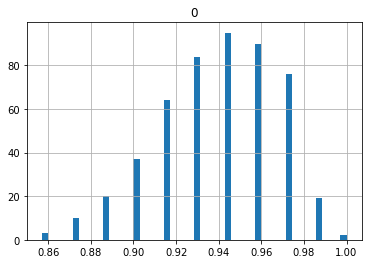

In [85]:
pd.DataFrame(scores_double_trained).hist(bins=50)